# Data Engineer Challenge

## Problem Statement

Company A needs to do a financial analysis on the prices of oil in order to make an important business decision. The 2 CSVs contain historical data of the daily prices of __two types__ of Oil.

Company A expects an output similar to this example (not actual real values):

| Date       | Price_Average | Oil_Type |
|------------|---------------|----------|
| 2010-10-01 | 22.3421       | Brent    |
| 2010-10-01 | 23.4564       | WTI      |
| 2010-10-02 | 22.2564       | Brent    |
| 2010-10-02 | 23.5324       | WTI      |

## Instalación de Librerías

Seleccionamos las librerías necesarias para llevar a cabo el procesamiento y análisis de datos.

- [Pandas](https://pandas.pydata.org/docs/index.html) es una librería que nos permite manipular fácilmente estructuras de datos.
- [NumPy](https://numpy.org/) es una librería que facilita el uso de operaciones matemáticas.
- [Seaborn](https://seaborn.pydata.org/index.html) es una librería para visualización de datos basada en __Matplotlib__.
- [Matplotlib](https://matplotlib.org/) es una librería para visualización de datos.

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib

## Importación de Librerías

Una vez instaladas las librerías, realizamos la importación y también asignamos un alias para acceder fácilmente a las herramientas que contienen.

In [2]:
import pandas as pd
import toolbox as box

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="bright")

## Directorio de Datos

Creamos una variable que almacene la ruta de acceso relativa en la que se encuentran los datos.

In [3]:
relative_path = "./data"

## Lectura de Datos

Haciendo uso de la función <code>read_csv</code> de la librería <code>pandas</code>, realizamos la lectura de los dos conjuntos de datos con formato <code>.CSV</code> almacenados en la ruta de acceso relativa.

In [4]:
brent_raw = pd.read_csv(f"{relative_path}/brent-daily.csv")
wti_raw = pd.read_csv(f"{relative_path}/wti-daily.csv")

## Análisis Exploratorio de Datos

Una primer aproximación es visualizar una pequeña muestra de los datos a fin de identificar las columnas e información que componen cada conjunto, así que empleamos el método <code>head</code>.

In [5]:
brent_raw.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [6]:
wti_raw.head()

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


Podemos apreciar lo siguiente:
- Los dos conjuntos de datos están compuestos por dos columnas: <code>Date</code> y <code>Price</code>, las cuales no siguen las normas para nombrar variables.
- La columna <code>Date</code> almacena fechas.
- La columna <code>Price</code> almacena números con punto flotante.
- Hay fechas faltantes en los dos conjuntos de datos.

Así que para comprobar que la información que almacenan las columnas corresponde con su tipo de dato, empleamos el método <code>info</code>.

In [7]:
brent_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8449 entries, 0 to 8448
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8449 non-null   object 
 1   Price   8449 non-null   float64
dtypes: float64(1), object(1)
memory usage: 132.1+ KB


In [8]:
wti_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8737 non-null   object 
 1   Price   8737 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.6+ KB


Comprobamos que es necesario ajustar el tipo de dato de la columna <code>Date</code> y además, que existe más cantidad de registros en el conjunto de datos correspondiente al petroleo __WTI__.

## Renombramiento de Variables

De acuerdo con [PEP 8](https://www.python.org/dev/peps/pep-0008/#function-and-variable-names) los nombres de las variables deben estar en minúsculas, así que realizamos el renombramiento haciendo uso del método <code>rename</code>.

In [9]:
brent_data = brent_raw.rename(columns={"Date": "date", "Price": "price"})
wti_data = wti_raw.rename(columns={"Date": "date", "Price": "price"})

## Conversión de Tipos de Datos

Como podemos observar, el tipo de dato de la columna <code>date</code> no es consistente, así que realizamos la conversión de <code>Object</code> a <code>DateTime</code> haciendo uso del método <code>astype</code>.

In [10]:
brent_data = brent_data.astype({"date": "datetime64[ns]"})
wti_data = wti_data.astype({"date": "datetime64[ns]"})

## Adición de Fechas Faltantes

Un punto importante a considerar es la asusencia de ciertas fechas, lo que podria complicar el proceso para llevar a cabo el cálculo de la [Media Móvil Simple](https://www.georgiaruralhealth.org/blog/what-is-a-moving-average-and-why-is-it-useful/). Así que empleamos la función <code>add_missing_dates</code> de nuestra librería <code>toolbox</code> para añadir las fechas faltantes con su respectivo precio.

> Los precios faltantes corresponderán al precio del día anterior asumiendo que fueron omitidos por no presentar un aumento o descenso.

In [11]:
new_brent_data = box.add_missing_dates(brent_data)
new_wti_data = box.add_missing_dates(wti_data)

## Cálculo de la Media Móvil Simple

Haciendo uso de la función <code>get_simple_moving_average</code> de nuestra librería <code>toolbox</code> realizaremos el cálculo de la media de precios en un margen de los últimos 7 días.

In [12]:
window = 7
brent_sma = box.get_simple_moving_average(new_brent_data, window)
wti_sma = box.get_simple_moving_average(new_wti_data, window)

## Unión de los Conjuntos de Datos

Una vez que hemos calculado la __Media Móvil Simple__, empleamos la función <code>append_data</code> de nuestra librería <code>toolbox</code> para unir la información de los dos conjuntos de datos a través de la columna <code>date</code> y además, agregar la columna <code>oil_type</code> para identificar a que conjunto pertenece cada registro.

In [13]:
oil_data = box.append_data(brent_sma, wti_sma, "Brent", "WTI")

## Respaldo del Conjunto de Datos

Finalmente, haciendo uso del método <code>to_csv</code> almacenamos el conjunto de datos pre-procesado en formato <code>.CSV</code>.

>El formato <code>.CSV</code> nos permite una fácil integración con bases de datos ya existentes, herramientas como PowerBI para generar reportes interactivos, entre otros.

In [14]:
oil_data.to_csv(f"{relative_path}/oil-data.csv", index=False)

# Análisis del Petróleo desde el año 2000 hasta el año 2020

Realizaremos un breve análisis sobre el incremento en el precio de dos tipos de petróleo: Brent y WTI.

### Tipo Brent

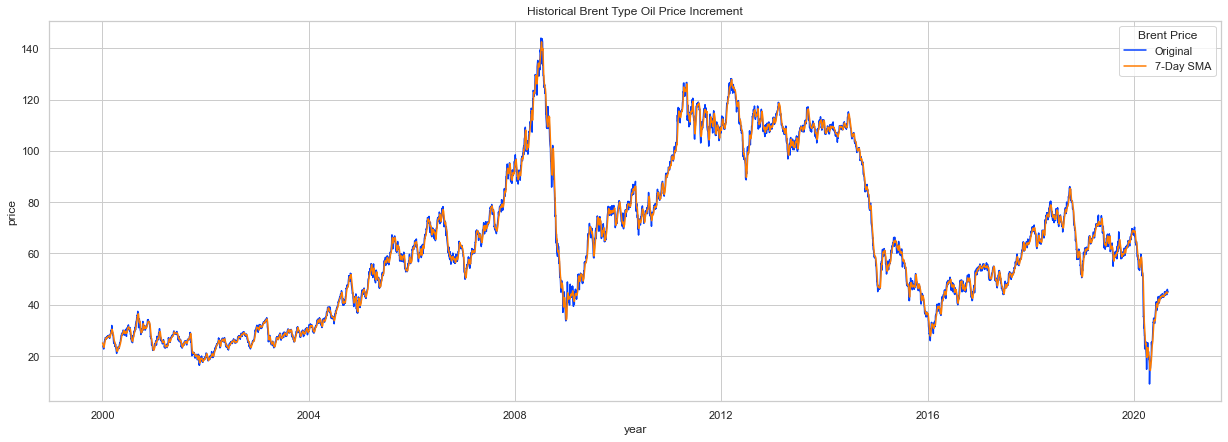

In [15]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(21, 7))
sns.lineplot(data=brent_data[brent_data["date"] >= "2000-01-01"], x="date", y="price", ax=axes);
sns.lineplot(data=oil_data[(oil_data["oil_type"] == "Brent") & (oil_data["date"] >= "2000-01-01")], x="date", y="price", ax=axes)
axes.legend(title="Brent Price", labels=["Original", "7-Day SMA"])
axes.set(title="Historical Brent Type Oil Price Increment", xlabel="year");

Con base en la gráfica podemos destacar lo siguiente:
- Existió un incremento casi lineal de 2000 hasta 2008, alcanzando un precio máximo de aproximadamente 140 dólares.
- Hubo un decremento del precio de aproximadamente 100 dólares entre 2008 y 2009.
- Actualmente el precio del petróleo Brent es menor a 50 dólares.

### Tipo WTI

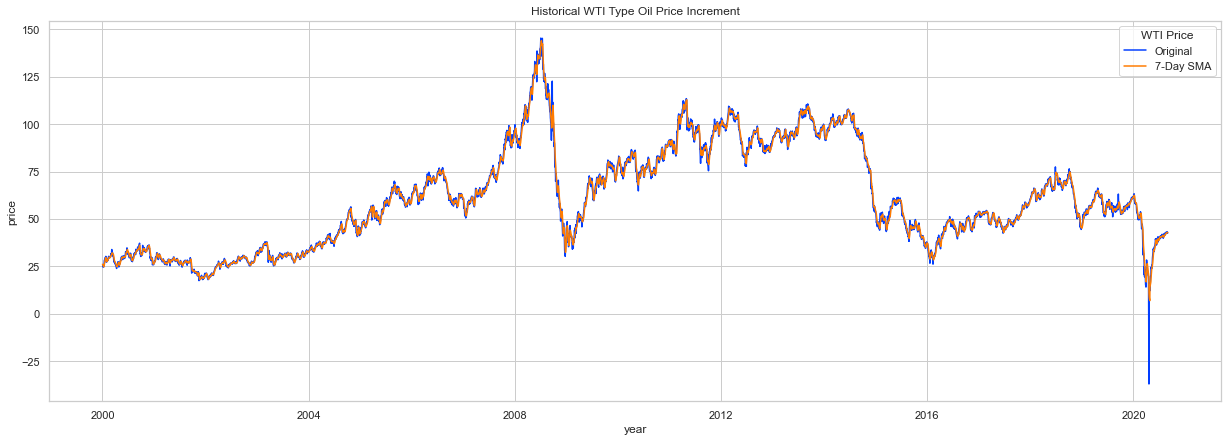

In [16]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(21, 7))
sns.lineplot(data=wti_data[wti_data["date"] >= "2000-01-01"], x="date", y="price", ax=axes);
sns.lineplot(data=oil_data[(oil_data["oil_type"] == "WTI") & (oil_data["date"] >= "2000-01-01")], x="date", y="price", ax=axes)
axes.legend(title="WTI Price", labels=["Original", "7-Day SMA"])
axes.set(title="Historical WTI Type Oil Price Increment", xlabel="year");

Con base en la gráfica podemos destacar lo siguiente:
- En 2020 el petróleo WTI alcanzó un precio negativo de aproximadamente -40 dólares.
- Al igual que el petróleo Brent, el petróleo WTI alcanzó un precio máximo de aproximadamente 150 dólares entre 2008 y 2009.
- El precio del petróleo WTI es más estable que el precio del petróleo Brent.